In [1]:
import io
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import numpy as np

In [2]:
plt.rcParams['figure.figsize']  = (16, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [3]:
plt.ion()
plt.style.use('seaborn-colorblind')

In [4]:
conn = sqlite3.connect('sql/sql.db')
cursor = conn.cursor()

In [5]:
#Executar só uma vez a cada vez que abrir o colab
f = io.open('sql/trabalho.sql', 'r', encoding='ISO-8859-1')
sql = f.read()
cursor.executescript(sql)

OperationalError: table ANSWERS already exists

Modelo relacional
<img src="diagrama/diagrama.png">

In [54]:
questoes_validas = []

In [55]:
query = """
Select Question,Qc
From Questions Natural jOIN Answers
WHERE Category == "ViolenceAndHarassment"

"""

df = pd.read_sql_query(query,conn)
i = 0

tira = [2,5,15,25,36,8,9,12,13,14,17,19,22,23,24,27,29,30,33,34,35,36,38,40,43,44,45,46]
for x in df["QC"].unique():
    if tira.count(i):
        i += 1
        continue
    questoes_validas.append(x)
    i += 1

In [59]:
def ver(x):
    if questoes_validas.count(x):
        return True
    else:
        return False

In [81]:
query = """
Select *
From Questions Natural jOIN Answers
WHERE Category == "ViolenceAndHarassment"

"""
df = pd.read_sql_query(query,conn)
df = df[df["QC"].apply(ver)]

for x in df.groupby(["QC","QUESTION","ANSWER"]).count().reset_index()[["QC","QUESTION","ANSWER"]].values:
    print("{}: \n {}: {}".format(x[0],x[1],x[2]))

e1: 
 Do you avoid holding hands in public with a same-sex partner for fear of being assaulted, threatened of harassed?: Don`t know
e1: 
 Do you avoid holding hands in public with a same-sex partner for fear of being assaulted, threatened of harassed?: I do not have a same-sex partner
e1: 
 Do you avoid holding hands in public with a same-sex partner for fear of being assaulted, threatened of harassed?: No
e1: 
 Do you avoid holding hands in public with a same-sex partner for fear of being assaulted, threatened of harassed?: Yes
e2: 
 Do you avoid certain places or locations for fear of being assaulted, threatened or harassed because you are L, G, B or T?: Don`t know
e2: 
 Do you avoid certain places or locations for fear of being assaulted, threatened or harassed because you are L, G, B or T?: No
e2: 
 Do you avoid certain places or locations for fear of being assaulted, threatened or harassed because you are L, G, B or T?: Yes
f1_a: 
 In the last 5 years, have you been: physically/se

In [6]:
query = """
Select *
FROM SIZE Natural JOIN ANSWERS NATURAL JOIN Country
where TIPO = SUBSET
"""

populacao = pd.read_sql_query(query,conn)
populacao

,COUNTRYCODE,TIPO,VALOR,SUBSET,QC,ANSWER,PERCENTAGE,NOTES,COUNTRY
0,0,LESBIAN,437,LESBIAN,b1_a,Very widespread,8,NULL,AT
1,0,LESBIAN,437,LESBIAN,b1_a,Fairly widespread,34,NULL,AT
2,0,LESBIAN,437,LESBIAN,b1_a,Fairly rare,45,NULL,AT
3,0,LESBIAN,437,LESBIAN,b1_a,Very rare,9,NULL,AT
4,0,LESBIAN,437,LESBIAN,b1_a,Don`t know,4,[0],AT
...,...,...,...,...,...,...,...,...,...
88190,11,TRANS,813,TRANS,fb2_9,Lesbian,1,[0],GB
88191,11,TRANS,813,TRANS,fb2_9,Gay,3,[0],GB
88192,11,TRANS,813,TRANS,fb2_9,Bisexual,1,[0],GB
88193,11,TRANS,813,TRANS,fb2_9,Mixed sexual orientation,3,NULL,GB


In [112]:
len(populacao["COUNTRY"].unique())

28

<AxesSubplot:xlabel='COUNTRY', ylabel='VALOR'>

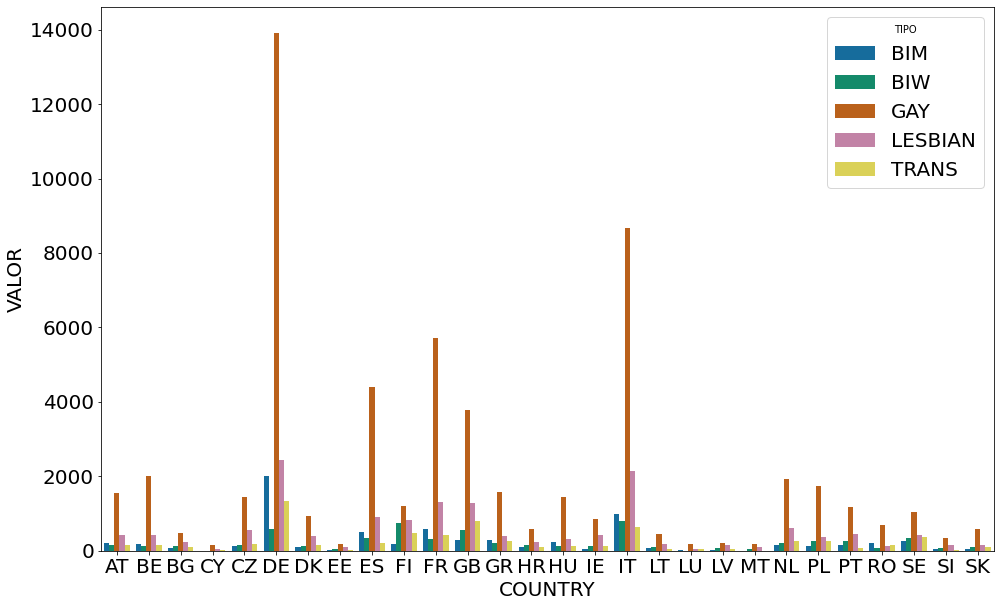

In [7]:
p = populacao.groupby(["COUNTRY","TIPO"]).mean()[["VALOR"]].reset_index()
sns.barplot(x = "COUNTRY", y = "VALOR", data = p, hue = "TIPO")

# Violência contra a população trans

In [88]:
query = """
Select *
FROM SIZE Natural JOIN ANSWERS NATURAL JOIN Country NATURAL JOIN QUESTIONS
where TIPO = SUBSET AND CATEGORY = "ViolenceAndHarassment" AND (ANSWER = "Yes" or ANSWER = "No") AND TIPO = "TRANS"
"""

violencia = pd.read_sql_query(query,conn)

valores = violencia[["COUNTRYCODE","ANSWER","PERCENTAGE","VALOR"]]


,COUNTRYCODE,TIPO,VALOR,SUBSET,QC,ANSWER,PERCENTAGE,NOTES,COUNTRY,QUESTION,CATEGORY
0,0,TRANS,167,TRANS,e1,Yes,25,NULL,AT,Do you avoid holding hands in public with a sa...,ViolenceAndHarassment
1,0,TRANS,167,TRANS,e1,No,32,NULL,AT,Do you avoid holding hands in public with a sa...,ViolenceAndHarassment
2,1,TRANS,165,TRANS,e1,Yes,33,NULL,BE,Do you avoid holding hands in public with a sa...,ViolenceAndHarassment
3,1,TRANS,165,TRANS,e1,No,32,NULL,BE,Do you avoid holding hands in public with a sa...,ViolenceAndHarassment
4,2,TRANS,106,TRANS,e1,Yes,67,NULL,BG,Do you avoid holding hands in public with a sa...,ViolenceAndHarassment
...,...,...,...,...,...,...,...,...,...,...,...
547,25,TRANS,374,TRANS,fb2_5,No,33,NULL,SE,Do you think the MOST SERIOUS incident of hara...,ViolenceAndHarassment
548,27,TRANS,115,TRANS,fb2_5,Yes,69,NULL,SK,Do you think the MOST SERIOUS incident of hara...,ViolenceAndHarassment
549,27,TRANS,115,TRANS,fb2_5,No,23,[0],SK,Do you think the MOST SERIOUS incident of hara...,ViolenceAndHarassment
550,11,TRANS,813,TRANS,fb2_5,Yes,71,NULL,GB,Do you think the MOST SERIOUS incident of hara...,ViolenceAndHarassment


In [93]:
pais_0 = valores[valores["COUNTRYCODE"] == 0]
pais_0.head()

,COUNTRYCODE,ANSWER,PERCENTAGE,VALOR
0,0,Yes,25,167
1,0,No,32,167
54,0,Yes,43,167
55,0,No,38,167
108,0,Yes,26,167


In [101]:
distri = []

for x in pais_0.values:
    if x[1] == "Yes":
        for _ in range(x[2]):
            distri.append(1)
    else:
        for _ in range(x[2]):
            distri.append(0)

distri = pd.DataFrame(distri)
distri

,0
0,1
1,1
2,1
3,1
4,1
...,...
1054,0
1055,0
1056,0
1057,0


In [103]:
n_sub = 10000
size = len(distri)

values = np.zeros(n_sub)

for i in range(n_sub):
    sample = distri.sample(size,replace=True)
    
    values[i] = sample.mean()

<AxesSubplot:ylabel='Count'>

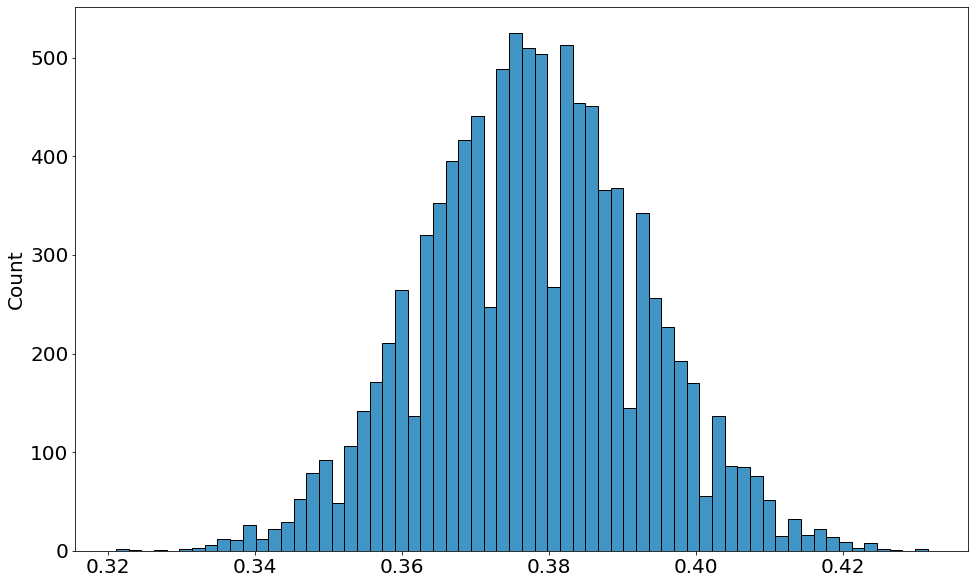

In [110]:
sns.histplot(values)

In [60]:
valores[valores["COUNTRYCODE"] == 0]

,COUNTRYCODE,TOTAL,ANSWER
0,0,15280.40,No
1,0,21893.80,Yes
2,0,28129.20,No
3,0,19933.40,Yes
4,0,39098.20,No
5,0,11761.80,Yes
6,0,25230.20,No
7,0,25629.80,Yes
8,0,50177.25,No
9,0,8518.75,Yes


In [33]:
for i in violencia["QUESTION"].unique():
    print(i)

Do you avoid holding hands in public with a same-sex partner for fear of being assaulted, threatened of harassed?
Do you avoid certain places or locations for fear of being assaulted, threatened or harassed because you are L, G, B or T?
In the last 5 years, have you been: physically/sexually attacked or threatened with violence at home or elsewhere (street, on public transport, at your workplace, etc) for any reason?
In the last 5 years, have you been: personally harassed by someone or a group for any reason in a way that really annoyed, offended or upset you - either at work, home, on the street, on public transport, in a shop, in an office or on the internet ?
Did you or anyone else report the last incident of physical / sexual attack or threat of violence to the police?
Do you think the LAST incident of physical / sexual attack or threat of violence in the past 12 months happened partly or completely because you were perceived to be L, G, B or T?
MOST SERIOUS physical / sexual attac

In [82]:
f.close()
conn.close()